# Regular Genomics Project **RNA Localisation**


In [1]:
from plotting import plot_line_graph, multiplot_pearson
from metrics import Pearson
from models import CNN
from utils import prepare_data, set_variables
import matplotlib.pyplot as plt

### **1.** Data Preparation

Firstly, we import several necessary packages and load in our data:

In [2]:
train_data, valid_data, test_data = prepare_data()

### **2** |  Initializations

We use as baseline model the [RNATracker](https://github.com/HarveyYan/RNATracker/blob/master/Models/cnn_bilstm_attention.py) model and a CNN model.


In [9]:
max_seq_len = train_data['seq'].apply(lambda x: len(x)).max()
model_name = 'flor_CNN_Att15'
model_architecture_path, model_output_path, params_dataLoader_train, params_dataLoader_valid, params_model, params_train = set_variables(model_name, max_seq_len)

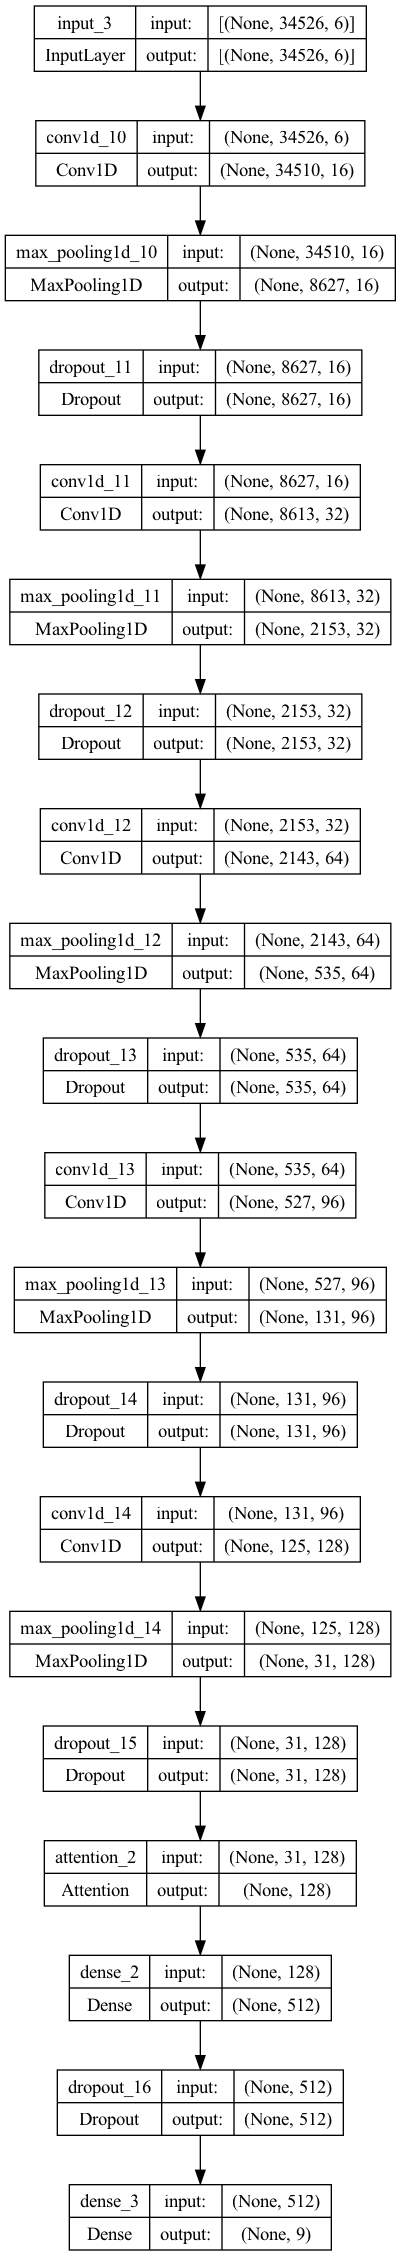

In [10]:
model = CNN(input_size=(max_seq_len, 6),
            params_model=params_model,
            metrics=[Pearson(return_dict=True)]
            )

model.print_model()
# model.summary() #if information about number of params needed

In [11]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 34526, 6)]        0         
                                                                 
 conv1d_10 (Conv1D)          (None, 34510, 16)         1648      
                                                                 
 max_pooling1d_10 (MaxPooli  (None, 8627, 16)          0         
 ng1D)                                                           
                                                                 
 dropout_11 (Dropout)        (None, 8627, 16)          0         
                                                                 
 conv1d_11 (Conv1D)          (None, 8613, 32)          7712      
                                                                 
 max_pooling1d_11 (MaxPooli  (None, 2153, 32)          0         
 ng1D)                                                     

In [12]:
history = model.fit_and_evaluate(train_data=train_data, eval_data=valid_data,
                                 params_train_dataLoader=params_dataLoader_train,
                                 params_eval_dataLoader=params_dataLoader_valid,
                                 params_train=params_train)

Epoch 1/20
311/311 [==============================] - 71s 226ms/step - loss: 2.1879 - ERM: 0.1649 - KDEL: 0.2082 - LMA: 0.0133 - MITO: 0.0844 - NES: 0.0067 - NIK: 0.0627 - NLS: 0.0312 - NUCP: 0.0746 - OMM: 0.0337 - val_loss: 2.1775 - val_ERM: 0.0170 - val_KDEL: 0.0753 - val_LMA: -0.0731 - val_MITO: -0.0437 - val_NES: 0.0214 - val_NIK: 0.0380 - val_NLS: -0.0314 - val_NUCP: 0.0278 - val_OMM: -0.0108
Epoch 2/20
311/311 [==============================] - 70s 225ms/step - loss: 2.1698 - ERM: 0.2703 - KDEL: 0.3093 - LMA: 0.0263 - MITO: 0.0873 - NES: 0.0554 - NIK: 0.0910 - NLS: 0.0822 - NUCP: 0.1296 - OMM: 0.0642 - val_loss: 2.1801 - val_ERM: 0.0353 - val_KDEL: 0.0435 - val_LMA: -0.0653 - val_MITO: -0.0284 - val_NES: 0.0419 - val_NIK: 0.0439 - val_NLS: -0.0040 - val_NUCP: 0.0428 - val_OMM: -0.0093
Epoch 3/20
311/311 [==============================] - 69s 221ms/step - loss: 2.1682 - ERM: 0.3012 - KDEL: 0.3368 - LMA: 0.0653 - MITO: 0.1170 - NES: 0.0699 - NIK: 0.1324 - NLS: 0.0948 - NUCP: 0.1692

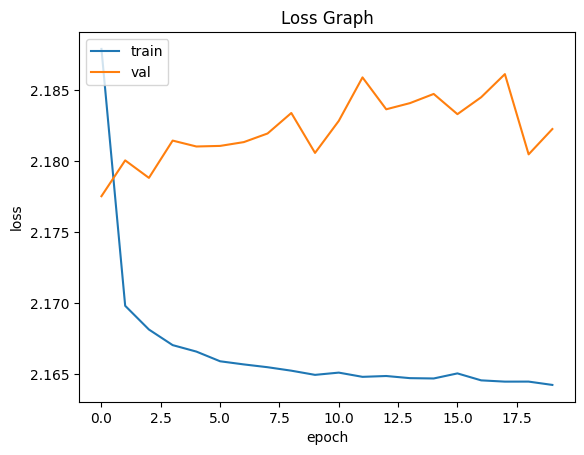

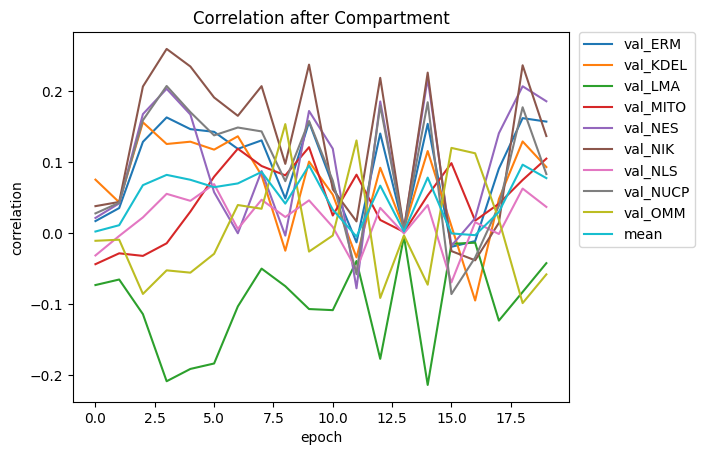

In [13]:
plt_data = [history.history['loss'], history.history['val_loss']]
plot_line_graph(plt_data, "Loss Graph", 'loss', 'epoch', ['train', 'val'])

multiplot_pearson(history.history)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

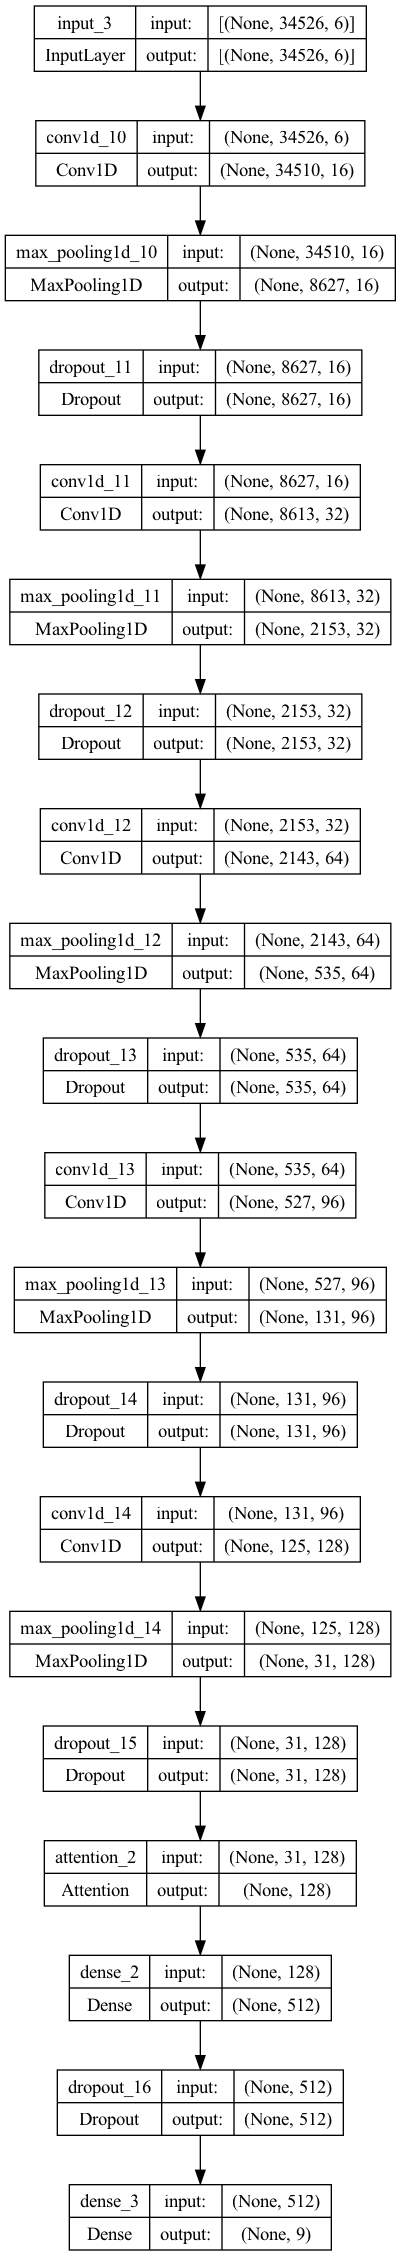

In [14]:
model.print_model(model_architecture_path)
#model.save_model(model_output_path)

In [15]:
model.save_model(model_output_path)